In [1]:
import h5py

In [8]:
#Check if insatfilepath exists

import os.path
insatfilepath=path=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\2019 Jan\3RIMG_01JAN2019_0615_L1B_STD_V01R00.h5"
os.path.exists(insatfilepath)

True

In [5]:
insatfilepath=path=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\2019 Jan\3RIMG_01JAN2019_0615_L1B_STD_V01R00.h5"
import h5py
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

file=h5py.File(insatfilepath)
viscount=np.squeeze(np.ma.masked_equal(file['IMG_VIS'],0))
albedolut=np.array(file["IMG_VIS_ALBEDO"])
def counttoalbedo(count):
    return albedolut[count]
albedoarray=counttoalbedo(viscount)



channellist=["IMG_WV","IMG_MIR","IMG_TIR1","IMG_TIR2"]
for i in channellist:
    countarray=np.array(file[i])
    countarray=np.ma.masked_equal(countarray,1023)

    lut=np.array(file[i+str("_TEMP")])
    def counttobt(count):
        return lut[count]
    if i=="IMG_WV":
        wvtemparray=counttobt(countarray)
    elif i=="IMG_MIR":
        mirtemparray=counttobt(countarray)
    elif i=="IMG_TIR1":
        tir1temparray=counttobt(countarray)
    else:
        tir2temparray=counttobt(countarray)

#np.array_equal(wvtemparray,mirtemparray) All combos are false. Good
tirlatitude=np.ma.masked_equal(file["Latitude"],32767)/100
tirlongitude=np.ma.masked_equal(file["Longitude"],32767)/100
vislatitude=np.ma.masked_equal(file["Latitude_VIS"],32767)/1000
vislongitude=np.ma.masked_equal(file["Longitude_VIS"],32767)/1000
wvlatitude=np.ma.masked_equal(file["Latitude_WV"],32767)/100
wvlongitude=np.ma.masked_equal(file["Longitude_WV"],32767)/100

fig=plt.figure(figsize=[16,8])
gs=GridSpec(nrows=2,ncols=3)


<Figure size 1600x800 with 0 Axes>

In [3]:
map_proj=ccrs.Geostationary(central_longitude=74,satellite_height=36000000)
ax=plt.axes(projection=map_proj)
ax.set_global()
ax.coastlines()
ax.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)
cb = ax.contourf(vislongitude,vislatitude,albedoarray,cmap='jet',transform=ccrs.PlateCarree())
ax.title("Visibel channel Albedo (0.65µ)")
plt.colorbar(cb,pad=0.1)
plt.show()


KeyboardInterrupt: 

Exception ignored in: 'pyproj._datadir.pyproj_log_function'
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 1446, in debug
    def debug(self, msg, *args, **kwargs):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pyproj._datadir.pyproj_log_function'
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 1446, in debug
    def debug(self, msg, *args, **kwargs):
KeyboardInterrupt: 


In [1]:
#Check which version of geopy is installed
import geopy
geopy.__version__

'2.3.0'

In [43]:
fig=plt.figure(figsize=[16,8])
# gs=GridSpec(nrows=2,ncols=3)
# ax0=fig.add_subplot(gs[0,0])
# ax1=fig.add_subplot(gs[0,1])
# ax2=fig.add_subplot(gs[0,2])
# ax3=fig.add_subplot(gs[1,0])
# ax4=fig.add_subplot(gs[1,1])

map_proj=ccrs.Geostationary(central_longitude=74,satellite_height=36000000)
ax0=plt.axes(projection=map_proj)
ax0.set_global()
ax0.coastlines()
ax0.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)
cb = ax0.contourf(vislongitude,vislatitude,albedoarray,cmap='jet',transform=ccrs.PlateCarree())
ax0.title("Visibel channel Albedo (0.65µ)")
plt.colorbar(cb,pad=0.1)
plt.show()
print("Done")

ax1=plt.axes(projection=map_proj)
ax1.set_global()
ax1.coastlines()
ax1.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)
cb = ax1.contourf(tirlongitude,tirlatitude,mirtemparray,cmap='jet',transform=ccrs.PlateCarree())
ax1.show("MIR Brightness Temp. (3.907µ)")
plt.colorbar(cb,pad=0.1)
plt.show()
print("Done")

ax2=plt.axes(projection=map_proj)
ax2.set_global()
ax2.coastlines()
ax2.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)
cb = ax2.contourf(wvlongitude,wvlatitude,wvtemparray,cmap='jet',transform=ccrs.PlateCarree())
ax2.title("WV Brightness Temp. (6.86µ)")
plt.colorbar(cb,pad=0.1)
plt.show()
print("Done")

ax3=plt.axes(projection=map_proj)
ax3.set_global()
ax3.coastlines()
ax3.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)
cb = ax3.contourf(tirlongitude,tirlatitude,tir1temparray,cmap='jet',transform=ccrs.PlateCarree())
ax3.title("TIR1 Brightness Temp. (10.8µ)")
plt.colorbar(cb,pad=0.1)
plt.show()
print("Done")

ax4=plt.axes(projection=map_proj);
ax4.set_global()
ax4.coastlines()
ax4.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)
cb = ax4.contourf(tirlongitude,tirlatitude,tir2temparray,cmap='jet',transform=ccrs.PlateCarree())
ax4.title("TIR2 Brightness Temp. (12µ)")
plt.colorbar(cb,pad=0.1)
plt.show()

# ax0.set_global()
# ax0.coastlines(color='black',linewidth=0.5)




KeyboardInterrupt: 

Exception ignored in: 'pyproj._datadir.pyproj_log_function'
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\logging\__init__.py", line 1446, in debug
    def debug(self, msg, *args, **kwargs):
KeyboardInterrupt: 


In [1]:
pip list

Package           Version   Editable project location
----------------- --------- ---------------------------------------------------------
asttokens         2.1.0
backcall          0.2.0
basemap           1.3.6
basemap-data      1.3.2
Cartopy           0.20.2
certifi           2022.9.24
cftime            1.6.2
colorama          0.4.6
contourpy         1.0.6
csat              0.0.1     C:\Users\HP\OneDrive\Desktop\Python\Cloudsat project\csat
cycler            0.11.0
Cython            0.29.32
debugpy           1.6.3
decorator         5.1.1
entrypoints       0.4
executing         1.2.0
fonttools         4.38.0
geographiclib     2.0
geopy             2.3.0
global-land-mask  1.0.0
h5py              3.7.0
ipykernel         6.17.1
ipython           8.6.0
jedi              0.18.2
jupyter_client    7.4.7
jupyter_core      5.0.0
kiwisolver        1.4.4
matplotlib        3.5.2
matplotlib-inline 0.1.6
nest-asyncio      1.5.6
netCDF4           1.6.2
numpy             1.23.5
packaging         21.3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.lines import Line2D
import pandas as pd
from pyhdf.SD import SD, SDC
from pyhdf import HDF, VS, V
from time import gmtime, strftime
from datetime import datetime
import time
import geopy.distance
import os
import sys

Build basic blocks first. Function to get 

1- Start time, end time of cloudsat file in seconds and UTC (Takes file or filepath as input) (csatstarttime, csatendtime, csatstartutc, csatendutc)

2- Average acquisiton time of insat file in seconds in UTC (Ditto) (insatacqtimesec,insatacqtimeutc)

In [34]:
#Input - cloudsat file or file path. Output - Profile start time in seconds since start of day

def csatstarttimesec(csatfilepathorfile): #Works
    if type(csatfilepathorfile)==str:        #If the input is a file path
        h=HDF.HDF(csatfilepathorfile)
    else:                                   #If the input is a file itself
        h=csatfilepathorfile
    vs=h.vstart()
    xid=vs.find("UTC_start")
    dataid=vs.attach(xid)
    dataid.setfields("UTC_start")
    nrecs,_,_,_,_=dataid.inquire()
    data=dataid.read(nRec=nrecs)
    data=list(np.concatenate(data))
    return data[0]

def csatstarttimeutc(csatfilepath): #Works
    starttimesec=csatstarttimesec(csatfilepath)
    return time.strftime('%H:%M:%S', time.gmtime(starttimesec))

In [4]:
path=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS-LIDAR\2019001055106_67529_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E08_F03.hdf"
csatstarttimesec(path), csatstarttimeutc(path)

NameError: name 'csatstarttimesec' is not defined

In [50]:
#Input - cloudsat file or file path. Output - End time in seconds since start of day
#Caution - from datetime import datetime is used. Do not again import datetime just like that.

def csatendtimesec(csatfilepathorfile): #Works
    searchdatasetlist=["UTC_start","Profile_time"]
    if type(csatfilepathorfile)==str:        #If the input is a file path
        h=HDF.HDF(csatfilepathorfile)
    else:                                   #If the input is a file itself
        h=csatfilepathorfile
    
    dataset_list=[]
    for i in searchdatasetlist:
        vs=h.vstart()
        xid=vs.find(i)
        dataid=vs.attach(xid)
        dataid.setfields(i)
        nrecs,_,_,_,_=dataid.inquire()
        data=dataid.read(nRec=nrecs)
        data=list(np.concatenate(data))
        dataset_list.append(data)
#        print(data[0])
    return (dataset_list[0]+dataset_list[1][-1])[0]

def csatendtimeutc(csatfilepath): #Works
    endtimesec=csatendtimesec(csatfilepath)
    return time.strftime('%H:%M:%S', time.gmtime(endtimesec))

In [5]:
#Input - INSAT file or file path. Output - Acquisition time in seconds since start of day

def insatacqtimesec(insatfilepathorfile): #Works
    if type(insatfilepathorfile)==str:        #If the input is a file path
        insatfile=h5py.File(insatfilepathorfile)
    else:
        insatfile=insatfilepathorfile

    acq_start = str(insatfile.attrs['Acquisition_Start_Time'])[2:13]+"-"+ str(insatfile.attrs['Acquisition_Start_Time'])[14:-1] #To remove a T in the middle of string
    acq_end = str(insatfile.attrs['Acquisition_End_Time'])[2:13]+"-"+ str(insatfile.attrs['Acquisition_End_Time'])[14:-1]
    start_time_obj=datetime.strptime(acq_start, "%d-%b-%Y-%H:%M:%S")
    end_time_obj=datetime.strptime(acq_end, "%d-%b-%Y-%H:%M:%S")
    acq_time=start_time_obj+(end_time_obj-start_time_obj)/2
    return acq_time.hour*3600+acq_time.minute*60+acq_time.second

def insatacqtimeutc(insatfilepathorfile): #Works
    acqtimesec=insatacqtimesec(insatfilepathorfile)
    return time.strftime('%H:%M:%S', time.gmtime(acqtimesec))

def insatstarttimesec(insatfilepath):
    if type(insatfilepath)==str:        #If the input is a file path
        insatfile=h5py.File(insatfilepath)
    else:
        insatfile=insatfilepath
    acq_start = str(insatfile.attrs['Acquisition_Start_Time'])[2:13]+"-"+ str(insatfile.attrs['Acquisition_Start_Time'])[14:-1] #To remove a T in the middle of string
    start_time_obj=datetime.strptime(acq_start, "%d-%b-%Y-%H:%M:%S")
    return start_time_obj.hour*3600+start_time_obj.minute*60+start_time_obj.second
      
def insatendtimesec(insatfilepath):
    if type(insatfilepath)==str:        #If the input is a file path
        insatfile=h5py.File(insatfilepath)
    else:
        insatfile=insatfilepath
    acq_end = str(insatfile.attrs['Acquisition_End_Time'])[2:13]+"-"+ str(insatfile.attrs['Acquisition_End_Time'])[14:-1]
    end_time_obj=datetime.strptime(acq_end, "%d-%b-%Y-%H:%M:%S")
    return end_time_obj.hour*3600+end_time_obj.minute*60+end_time_obj.second


#path=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01JAN2019_0615_L1B_STD_V01R00.h5"

In [6]:
path=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01JAN2019_0615_L1B_STD_V01R00.h5"
insatacqtimesec(path),insatacqtimeutc((path)), insatstarttimesec(path), insatendtimesec(path)

(23330, '06:28:50', 22523, 24137)

In [8]:
#Convert insat start and end time into utc


starttimesec=insatstarttimesec(path)
time.strftime('%H:%M:%S', time.gmtime(starttimesec))

endtimesec=insatendtimesec(path)
time.strftime('%H:%M:%S', time.gmtime(endtimesec))

'06:42:17'

In [6]:
def collocate(csatfilepathorfile,insatfilepathorfile):
    if type(insatfilepathorfile)==str:        #If the input is a file path
        insatfile=h5py.File(insatfilepathorfile)
    else:
        insatfile=insatfilepathorfile
#Return start and end time of insat file in seconds since start of day. Same for acq time
    acq_start = str(insatfile.attrs['Acquisition_Start_Time'])[2:13]+"-"+ str(insatfile.attrs['Acquisition_Start_Time'])[14:-1] #To remove a T in the middle of string
    start_time_obj=datetime.strptime(acq_start, "%d-%b-%Y-%H:%M:%S")
    insatstarttime=start_time_obj.hour*3600+start_time_obj.minute*60+start_time_obj.second
    
    acq_end = str(insatfile.attrs['Acquisition_End_Time'])[2:13]+"-"+ str(insatfile.attrs['Acquisition_End_Time'])[14:-1]
    end_time_obj=datetime.strptime(acq_end, "%d-%b-%Y-%H:%M:%S")
    insatendtime = end_time_obj.hour*3600+end_time_obj.minute*60+end_time_obj.second

    acq_time=start_time_obj+(end_time_obj-start_time_obj)/2
    insatacqtime = acq_time.hour*3600+acq_time.minute*60+acq_time.second

#Extracting 1D datasets from Cloudsat file, relevant to us

    geofieldsearch=['Latitude','Longitude','DEM_elevation','Profile_time','Navigation_land_sea_flag','UTC_start']
    oneddatasearch=['Cloudlayer']

    if type(csatfilepathorfile)==str:        #If the input is a file path
        h=HDF.HDF(csatfilepathorfile)
    else:                                   #If the input is a file itself
        h=csatfilepathorfile
    
    csatlongitude=[]
    csatlatitude=[]
    csatdem=[]
    csatprofiletime=[]
    csatlandsea=[]
    cloudlayer=[]

    geodatasetlist=[]
    oneddatasetlist=[]
    for i in geofieldsearch:
        vs=h.vstart()
        xid=vs.find(i)
        dataid=vs.attach(xid)
        dataid.setfields(i)
        nrecs,_,_,_,_=dataid.inquire()
        data=dataid.read(nRec=nrecs)
        data=list(np.concatenate(data))
        geodatasetlist.append(data)
    for i in oneddatasearch:
        vs=h.vstart()
        xid=vs.find(i)
        dataid=vs.attach(xid)
        dataid.setfields(i)
        nrecs,_,_,_,_=dataid.inquire()
        data=dataid.read(nRec=nrecs)
        data=list(np.concatenate(data))
        oneddatasetlist.append(data)
    
    vislatitude=np.ma.masked_equal(insatfile["Latitude_VIS"],32767)/1000
    vislongitude=np.ma.masked_equal(insatfile["Longitude_VIS"],32767)/1000
    tirlongitude=np.ma.masked_equal(insatfile["Longitude"],32767)/100
    tirlatitude=np.ma.masked_equal(insatfile["Latitude"],32767)/100
    solarelevationarray=np.ma.masked_equal(insatfile["Sun_Elevation"],32767)/100

    csatlatitude=geodatasetlist[0] #Works fine, all the geo fields work fine
    csatlongitude=geodatasetlist[1]
    elevation=geodatasetlist[2] 
    diffprofiletime=geodatasetlist[3] #Difference between profile time and UTC start
    csatlandsea=geodatasetlist[4] #1 = Land, 2 = Sea, 3 = Coast
    cloudlayer=oneddatasetlist[0] #No.of cloud layers
    

    insatleftlon=insatfile.attrs['left_longitude'][0]
    insatrightlon=insatfile.attrs['right_longitude'][0]
    insattoplat=insatfile.attrs['upper_latitude'][0]
    insatbottomlat=insatfile.attrs['lower_latitude'][0]
    
    print("All file reading done")
    
    #BT and Albedo data preparation (works fine)
    channel_listtir= ['IMG_MIR','IMG_TIR1','IMG_TIR2']
    btlist=[]
    countlist=[]

    for i in channel_listtir:
        img_arr=insatfile[i][0,:,:] 
        img_arr_fill=insatfile[i].attrs['_FillValue'][0]
        nanmask=(img_arr==img_arr_fill)
        btlut=np.array(insatfile[i+str('_TEMP')])
        def count2bt(count):
            return btlut[count]
        bt_array=count2bt(img_arr)
        bt_array[nanmask]=np.nan
        btlist.append(bt_array)
        #img_arr[nanmask]=np.nan
        #countlist.append(img_arr)

    img_arr=insatfile['IMG_VIS'][0,:,:]
    img_arr_fill=insatfile['IMG_VIS'].attrs['_FillValue'][0]
    nanmask=(img_arr==img_arr_fill)
    albedolut=np.array(insatfile['IMG_VIS_ALBEDO'])
    def count2albedo(count):
        return albedolut[count]
    albedo_array=count2albedo(img_arr)/100
    albedo_array[nanmask]=np.nan

    print("BT preparation done")
    #img_arr=float(img_arr)
    #img_arr[nanmask]=np.nan
    #countlist.append(img_arr)
    #return btlist, countlist, albedo_array

    #Cloudsat data preparation, first is cloudthickness preparation
    csatfile=SD(csatfilepathorfile, SDC.READ)

    cloudbasearray=csatfile.select('CloudLayerBase')[:,:]
    cloudbasearray[cloudbasearray==-99]=np.nan

    cloudtoparray=csatfile.select('CloudLayerTop')[:,:]
    cloudtoparray[cloudtoparray==-99]=np.nan

    cloudthickness=cloudtoparray-cloudbasearray
    thicknesssum=np.nansum(cloudthickness, axis=1) #undetermined and clear pixels =0 for nansum
    thicknesssum[np.array(cloudlayer==-9.0)]=np.nan #if profile is undetermined, put thickness as nan, else 0 thickness

    #Land/Sea flag 1-land, 2-ocean, 1.5-coast (Works, unique elements are 1,1.5 and 2)
    csatlandsea=np.array(csatlandsea,dtype=float)
    csatlandsea[csatlandsea==3]=1+0.5
    csatlandsea[csatlandsea==4]=2.0
    csatlandsea[csatlandsea==5]=1+0.5

    #Time preparation
    csatstart=geodatasetlist[5][0] #aftering indexing[0], 21066.328 for granule no. 67529
    csatprofiletime=[(i+csatstart) for i in diffprofiletime]
    
    print("All data preparation done")
    #return csatlandsea 

    
    #Collocation part  
    #Part 1 - Collocaiton in time space #Works fine, checked.

    timeindex=[]
    print("The profile no. of collocated pixels are follow \n")

    for i in range(len(csatprofiletime)): 
        if csatprofiletime[i]>insatstarttime and csatprofiletime[i]<insatendtime:
            timeindex.append(i)
    csattime=csatprofiletime[timeindex[0]:timeindex[-1]]
    #return csattime, insatstarttime, insatendtime
    print("Time collocation is done")
    timecollongitude=csatlongitude[timeindex[0]:timeindex[-1]]
    timecollatitude=csatlatitude[timeindex[0]:timeindex[-1]]

    #return timecollongitude, timecollatitude

    #Part 2 - Collocation in space
    landseacoll = []
    thicknesscoll = []
    albedolist = []
    btmirlist = []
    bttir1list = []
    bttir2list = []
    tirindexlist = []
    offsettirlist = []
    offsetvislist = []
    insatcoordtir = []
    insatcoordvis = []
    csatcoordtir = []
    csatcoordvis = []
    csatfinalindex = []
    elevationcoll = []
    solarelevationlist = []
    
    print("Starting space collocation")
    print("time collocated csat profile min = {}, max = {}".format(min(timeindex),max(timeindex)))

    for i in timeindex[0:5000]:
        clat = csatlatitude[i]
        clon = csatlongitude[i]
        

        if clat<-60 or clat>60:
            continue
        if clon<0 or clon>140:
            continue
        print(i),
        height=elevation[i]
        thick = thicknesssum[i]
        landsea = csatlandsea[i]

        combineddifftir = np.abs(tirlatitude-clat)+np.abs(tirlongitude-clon)
        indextir = np.nanargmin(combineddifftir)
        indextir = np.unravel_index(indextir,combineddifftir.shape)
        closestlattir = tirlatitude[indextir]
        closestlontir = tirlongitude[indextir]
        tiroffset = geopy.distance.distance((clat,clon),(closestlattir,closestlontir)).km
        #print("tir collocation done") #This is getting executed

        combineddiffvis = np.abs(vislatitude-clat)+np.abs(vislongitude-clon)
        indexvis = np.nanargmin(combineddiffvis)
        indexvis = np.unravel_index(indexvis,combineddiffvis.shape)
        closestlatvis = vislatitude[indexvis]
        closestlonvis = vislongitude[indexvis]
        visoffset = geopy.distance.distance((clat,clon),(closestlatvis,closestlonvis)).km
        #print("visible collocaiton is done") #This is getting executed but extremely slow

        if tiroffset>1.0:
            continue
        if visoffset>1.0:
            continue

        btmir=btlist[0][indextir]
        bttir1=btlist[1][indextir]
        bttir2=btlist[2][indextir]
        albedo=albedo_array[indexvis]

        print("bt albedo loaded"),

        if np.isnan(btmir) or np.isnan(bttir1) or np.isnan(bttir2) or np.isnan(albedo):
            continue
        # if np.isnan(bttir1):
        #     continue
        # if np.isnan(bttir2):
        #     continue
        # if np.isnan(albedo):
        #     continue
        
        print(i, "all set"),
        landseacoll.append(landsea)
        thicknesscoll.append(thick)
        btmirlist.append(btmir)
        bttir1list.append(bttir1)
        bttir2list.append(bttir2)
        albedolist.append(albedo)
        solarelevationlist.append(solarelevationarray[i])
        tirindexlist.append(indextir)
        offsettirlist.append(tiroffset)
        offsetvislist.append(visoffset)
        insatcoordtir.append((closestlattir,closestlontir))
        insatcoordvis.append((closestlatvis,closestlonvis))
        offsettirlist.append(tiroffset)
        offsetvislist.append(visoffset)
        elevationcoll.append(height)
    print("Space collocation is done")
    #Make a dataframe for all the lists
    df = pd.DataFrame({'solarelevation':solarelevationlist,'albedo':albedolist,'btmir':btmirlist,'bttir1':bttir1list,'bttir2list':bttir2list,
    'cloudthickness':thicknesscoll,'tiroffset':offsettirlist,'visoffset':offsetvislist,
    'insatcoordtir':insatcoordtir,'insatcoordvis':insatcoordvis,'landsea':landseacoll,'elevation':elevationcoll})

    return df


A

b


In [7]:
df = collocate(csatpath,insatpath)
df.head()

All file reading done
BT preparation done
All data preparation done
The profile no. of collocated pixels are follow 

Time collocation is done
Starting space collocation
time collocated csat profile min = 9105, max = 19191
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
12267
12268
12269
12270
12271
12272
12273
12274
12275
12276
12277
12278
12279
12280
12281
12282
12283
12284
12285
12286
12287
12288
12289
12290
12291
12292
12293
12294
12295
12296
12297
12298
12299
12300
12301
12302
12303
12304
12305
12306
12307
12308
12309
12310
12311
12312
12313
12314
12315
12316
12317
12318
12319
12320
12321
12322
12323
12324
12325
12326


KeyboardInterrupt: 

In [68]:
#Check how many rows are there in the dataframe
df.shape

(0, 12)

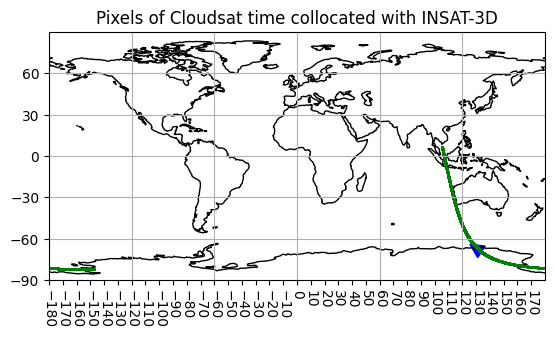

In [53]:
# #Measure time taken for the function
# start_time = time.time()
# lon,lat=collocate(csatpath,insatpath)
# print("--- %s seconds ---" % (time.time() - start_time))

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.gridlines()
#ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',scale='10m',name='admin_0_countries',edgecolor='black',facecolor='none'))
ax.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90 );
for i in range(len(lon)):
    plt.plot(lon[i],lat[i],'o',color='green',markersize=1,transform=ccrs.PlateCarree())
plt.title('Pixels of Cloudsat, time collocated with INSAT-3D');
plt.arrow(lon[2000],lat[2000],lon[2000]-lon[1900],lat[2000]-lat[1900],head_width=10, head_length=10,color='blue');

In [59]:
import sys
def func(x):
    y=x**2
    print(y)
    #Ask for permission to proceed with the function
    permission=input('Do you want to proceed?')
    if permission=='y':
        print("proceeding")
    else:
        #Exit the function from here
        sys.exit("not doing geographical collocation")
    print("Good")
func(2)

4


SystemExit: not doing geographical collocation

In [20]:
start, min(csattime), max(csattime), end

(22523, 22523.128173828125, 24136.72705078125, 24137)

In [32]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
array_index=(0,1),(0,2)
print(a[(0,1),(0,2)])
print(a[array_index])

[1 6]
[1 6]


In [3]:
csatpath=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\CLOUDSAT DATA\CLDCLASS-LIDAR\2019001055106_67529_CS_2B-CLDCLASS-LIDAR_GRANULE_P1_R05_E08_F03.hdf"
insatpath=r"C:\Users\HP\OneDrive\Desktop\HD5 Collection\L1B data\INSAT-3DR\3RIMG_01JAN2019_0615_L1B_STD_V01R00.h5"

In [152]:
btlist,countlist, albedo_array=collocate(csatpath,insatpath)

In [170]:
np.nanmax(albedo_array),np.nanmin(albedo_array),np.nanmean(albedo_array), albedo_array[2651][5288] #Works fins

(100.0, 0.111396, 18.657091, 13.813078)

In [154]:
#Check for btmir. countmir[716][1192]=702 -> 310.8 K, Expected 719, 309.151 K

countlist[0][716][1192], btlist[0][716][1192]

(719, 309.15057)

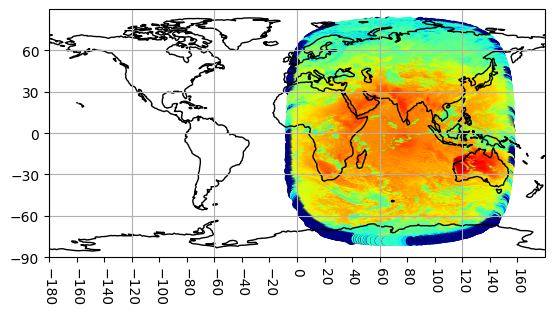

In [173]:
#Plot mir bt over globe (Wrong one, the locations are off by many kilometers. Look at the sillhouette of Ausrtalia

ax=plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
#ax.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=1.75, draw_labels=True)
ax.gridlines()
ax.set_xticks(np.arange(-180, 180, 10), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(-90, 90, 30), crs=ccrs.PlateCarree())

#Make more longitudes to appear on labels
ax.set_xticks(np.arange(-180, 180, 20), crs=ccrs.PlateCarree())
plt.setp( ax.xaxis.get_majorticklabels(), rotation=-90 );


insatfile=h5py.File(insatpath,'r')
tirlongitude=np.ma.masked_equal(insatfile["Longitude"],32767)/100
tirlatitude=np.ma.masked_equal(insatfile["Latitude"],32767)/100

plot=ax.scatter(tirlongitude,tirlatitude,c=btlist[0],cmap='jet',transform=ccrs.PlateCarree())
plt.colorbar(plot,pad=0.1)

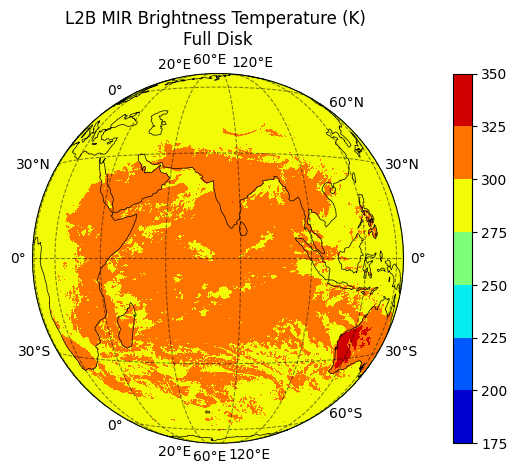

In [172]:
#Correct code

map_proj = ccrs.Geostationary(central_longitude=74,satellite_height=36000000)
map_proj_lat_lon = ccrs.PlateCarree()
ax = plt.axes(projection=map_proj)
ax.set_global()


ax.coastlines(color='black',linewidth = 0.5)
ax.gridlines(color='black', alpha=0.5, linestyle='--', linewidth=0.75, draw_labels=True)
#ax.add_geometries(ind_shapes,crs = map_proj, edgecolor = 'black', alpha = 0.5)
plt.title('L2B MIR Brightness Temperature (K) \n' +
           'Full Disk')
cb = ax.contourf(tirlongitude,tirlatitude,btlist[0], cmap = 'jet',transform = ccrs.PlateCarree())
plt.colorbar(cb,pad=0.1)